# IMPLEMENTATION DES DIFFERENTS ALGORITHMES 

 J'utilise une approche objet : chaque morceau sera une classe, et des instances (des objets) seront utilisées pour toutes les composantes.

In [1]:
import numpy as np

class UCB1 :
    """we create a new type of object called UCB1 with 
    Attributes:
    _ _ _ _ _ _  
    n_arms:int the number of arms"""
    def __init__(self, n_arms):
        self.n_arms = n_arms  # numbers of arms
        self.counts = np.zeros(n_arms) # for any arms we store  the number of time that it was played in this numpy table initialize by full zeros
        self.values = np.zeros(n_arms) # we also done that for store the average for all arms
        self.total_counts = 0 # for store the moment t step by step

    def select_arm(self):

        """This methode return the maximum value of the upper bound cumullative"""
        if self.total_counts < self.n_arms:
            #chaque bras est joué une fois: c'est le tir initial
            return self.total_counts
        else:
            UCB1_values = self.values + np.sqrt(2 * np.log(self.total_counts) / self.counts)
            return np.argmax(UCB1_values)    

    def update(self, chosen_arm, reward):
        """ this methode is used to update our algorithm it is an recursive methode
        intput:
                - chosen_arm : is the arm considered as chosen
                - reward is the reward ontained through the choise  of the  arm called chosen_arm  """

        self.counts[chosen_arm] += 1
        self.total_counts += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        new_value = ((n-1)/n)*value + (1/n)*reward #  il s'agit de la mise a jour de la moyenne empirique
        self.values[chosen_arm] = new_value

    




## Simulation de l'algorithme UCB 1

Nous souhaitons maintenant implémenter l’algorithme UCB1 et générer des graphes de regret, en considérant des récompenses de type Bernoulli. Pour cela, nous considérons le cas de K=2 bras, c’est-à-dire deux sources de récompenses aléatoires :

Le premier bras génère des observations issues d’une variable aléatoire 𝑋∼Bernoulli(1/3), Le second bras génère des observations(recompenses) issues d’une variable aléatoire Y∼Bernoulli(1/4) 

Recompense moyenne: 0.3214
Bras sélectionnés: [8733. 1267.]


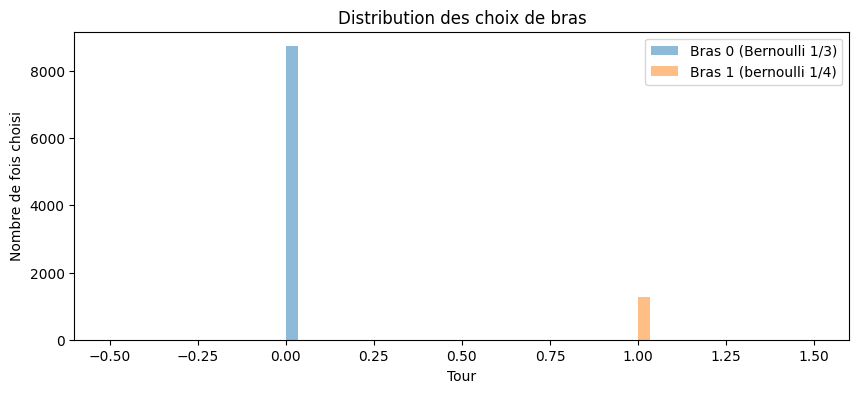

In [2]:
import matplotlib.pyplot as plt


def distribution_reward(arm, p_1, p_2):
        if arm == 0:
            reward = np.random.binomial(1, p_1) # une bernoulli
        elif arm == 1:
            reward = np.random.binomial(1, p_2 ) # une bernoulli est une binomial 1
        else:
            raise ValueError(f"Arm {arm} invalide. Il faut arm == 0 ou 1.")    
        return reward

def regret (expected_means, algo,n ):
    # regret
    tru_regret = max(expected_means) * n - np.sum(np.dot(expected_means, algo.counts))
    return tru_regret

n_rounds = 10000
algo = UCB1(n_arms=2)
rewards = []
chosen_arms = []
# Espérances des bras (estimées théoriquement)
expected_means = [1/3, 1/4]  
#mu_star = max(mu)
regrets_tru = [] 

#simulation
for t in range(1, n_rounds+1):
    arm = algo.select_arm()
    p_1 = 1/3
    P_2 = 1/4
    reward = distribution_reward(arm, p_1, P_2)
    algo.update(arm, reward)
    rewards.append(reward)
    chosen_arms.append(arm)
    tru_regret = regret(expected_means, algo, t)    
    regrets_tru.append(tru_regret)    
     
# on montre les resultats

print("Recompense moyenne:", np.mean(rewards))
print("Bras sélectionnés:", algo.counts)



# Visualisation
plt.figure(figsize=(10,4))
plt.hist([a for i, a in enumerate(chosen_arms) if a == 0], bins=30, alpha=0.5, label="Bras 0 (Bernoulli 1/3)")
plt.hist([a for i, a in enumerate(chosen_arms) if a == 1], bins=30, alpha=0.5, label="Bras 1 (bernoulli 1/4)")
plt.legend()
plt.title("Distribution des choix de bras")
plt.xlabel("Tour")
plt.ylabel("Nombre de fois choisi")
plt.show()

Le bras en bleu est le plus souvent choisit, ce qui concorde bien avec l'intuition car elle a une probabilité plus élevé comme paramètre

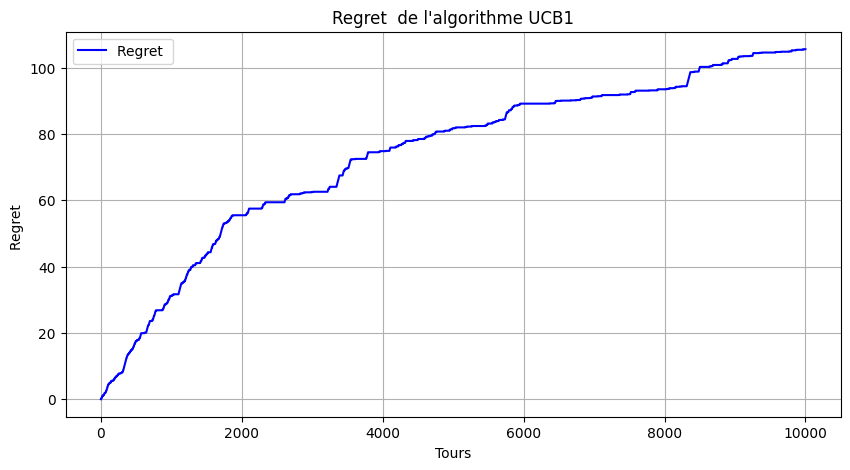

In [3]:
# Affichage : courbes de regret
plt.figure(figsize=(10,5))
plt.plot(regrets_tru, label="Regret ", color='blue')

plt.xlabel("Tours")
plt.legend()
plt.ylabel("Regret ")
plt.title("Regret  de l'algorithme UCB1")
plt.grid(True)
plt.show()

 Définition :   On définit le regret cumulé après t  tours  comme :
    $
    R(t) = t\mu^* - \sum_{i=1}^K \mu_i\mathbb{E}[T_{i}(t)]
    $
    où $ \mu^* = \max_{i=1,\dots,K} \mu_i $ est la récompense moyenne maximale et $ T_{i}(t) $ est le nombre de fois que  le bras i a éte choisit parmis les $ t $ tours ainsi jusqu'a n.

Il mesure ce qu’on a perdu en ne jouant pas toujours le meilleur bras.

La courbe est croissante, mais de plus en plus plate

Si le regret est plat, ça veut dire que l’algorithme a appris le bon bras.

Si le regret continue à augmenter vite, l'algorithme n'apprend pas bien.

### MAJORATION THEORIQUE DU REGRET CUMULE

On implemente une majoration du regret cumulé pour voir a quel poin cette majoration s'eloigne du regret pour ce la on utilise la majoration theorique donnée par peter et aur dans leurs article qui est donne par :

$$
R(n) \leq \sum_{i:\Delta_i > 0} \left( \frac{8 \log n}{\Delta_i} + \left(1 + \frac{\pi^2}{3} \right) \Delta_i \right)
$$


####  Implementation

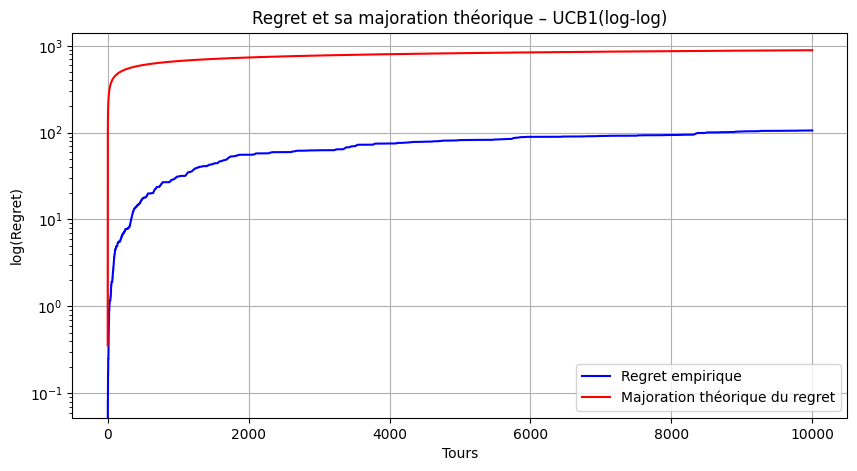

In [4]:
delta = [1/3- 1/4, 0.0]
th_bound = []

for t in range(1, n_rounds + 1):  # commencer à t=1 pour éviter log(0)
    bound = 0
    for d in delta:
        if d > 0:
            bound += (8 * np.log(t)) / d + (1 + np.pi ** 2 / 3) * d
    th_bound.append(bound)       

plt.figure(figsize=(10,5))
plt.plot(regrets_tru, label="Regret empirique", color='blue')
plt.plot(th_bound, label="Majoration théorique du regret", color="red")
plt.yscale("log")

plt.xlabel("Tours")
plt.ylabel("log(Regret)")
plt.title("Regret et sa majoration théorique – UCB1(log-log)")
plt.legend()
plt.grid(True)
plt.show()




On souhaite maintenant appliquer cette politique toujours sur deux bras mais avec des parametres differents soit donc les bras suivants:

(0.9, 0.6), (0.9, 0.8), (1/3, 1/4), (0.55, 0.45)  on trace donc le graphes de regret 

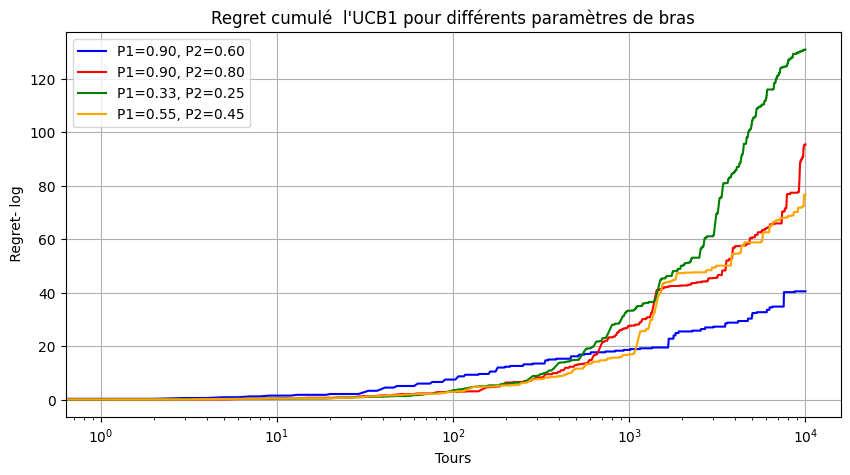

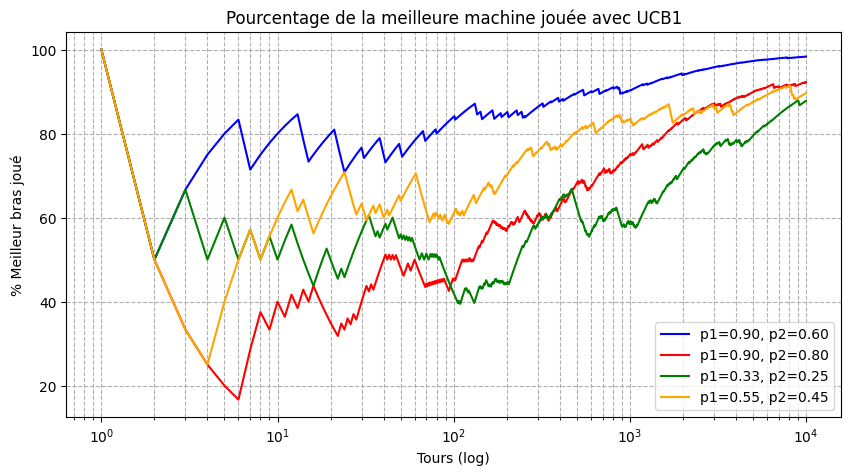

In [5]:
folowing_parameters = [(0.9, 0.6), (0.9, 0.8), (1/3, 1/4), (0.55, 0.45)]
colors = ["blue", "red", "green", "orange"]

plt.figure(figsize=(10, 5))

for idx, (P1, P2) in enumerate(folowing_parameters):
    algo = UCB1(n_arms=2)
    rewards = []
    chosen_arms = []
    regrets_tru = []
    expected_means = [P1, P2]

    for t in range(1, n_rounds + 1):
        arm = algo.select_arm()
        reward = distribution_reward(arm, P1, P2)
        algo.update(arm, reward)
        rewards.append(reward)
        chosen_arms.append(arm)
        tru_regret = regret(expected_means, algo, t)
        regrets_tru.append(tru_regret)

    # Tracé du log du regret
    plt.plot(regrets_tru, label=f"P1={P1:.2f}, P2={P2:.2f}", color=colors[idx])
plt.xscale("log")
#plt.yscale("log")
plt.xlabel("Tours")
plt.ylabel(" Regret- log")
plt.title("Regret cumulé  l'UCB1 pour différents paramètres de bras")
plt.legend()
plt.grid(True)
plt.show()



## Courbe du pourcentage du meilleur bras joué
plt.figure(figsize=(10, 5))

for idx, (p1, p2) in enumerate(folowing_parameters):
    algo = UCB1(n_arms=2)
    chosen_arms = []
    best_arm = 0 if p1 >= p2 else 1
    best_arm_counts = []

    for t in range(1, n_rounds + 1):
        arm = algo.select_arm()
        reward = distribution_reward(arm, p1, p2)
        algo.update(arm, reward)
        chosen_arms.append(arm)

        best_arm_count = chosen_arms.count(best_arm)
        best_arm_counts.append(100 * best_arm_count / t)

    plt.plot(range(1, n_rounds + 1), best_arm_counts, 
             label=f"p1={p1:.2f}, p2={p2:.2f}", color=colors[idx])

plt.xscale('log')
plt.xlabel("Tours (log)")
plt.ylabel("% Meilleur bras joué")
plt.title("Pourcentage de la meilleure machine jouée avec UCB1")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()
    


- le premier graphique:  les différentes courbes de regrets pour les paramètres énoncés, tracées avec une échelle log en abscisse
    
    On remarque que pour tous les paramètres on a les mêmes tendances de croissances, le fait d'appliquer un échelle logarithmique a l'axe des abscisses nous permet d'observer un sub-linéarité qui prouve que la croissance est logarithmique

- Le deuxième graphique représente pour un nombre de tours jouer le pourcentage d'avoir joué le bras

     - on remarque que pour tous les paramètres on a presque les mêmes tendances ce qui prouve que l'algorithme apprend  correctement  

# Implementation de l'algorithme ETC

Ici on dispose toujours de K bras, a la seul difference que l'on procède  en deux etapes:

- On explore chaques bras m fois et on calcule pour chaque bras la moyenne empirique des recompences 
- puis on prend le bras avec la plus grande  moyenne empirique

Ansi le bras $A_t$ choisit est :

$$
    A_t = argmax_i \hat{\mu_i}(mk)

$$   

Pour des raisons de non redondance, on va creer un classe fille qui herite des attribut de la classe UCB 1 

In [6]:
class ETC(UCB1):  # ETC hérite de UCB1

    def __init__(self, n_arms, m):
        super().__init__(n_arms)
        self.m = m
        self.best_arm = None

    def select_arms_ETC(self):
        # Phase d'exploration
        for arm in range(self.n_arms):
            if self.counts[arm] < self.m:
                return arm
        # Phase d'exploitation
        if self.best_arm is None:
            self.best_arm = np.argmax(self.values)
        return self.best_arm



### Implementation de cet algorithme pour differente valeurs de m
Pour des valeurs de m croissantes et regroupés dans une liste de manière croissante, je vais implementer cette algorithme en traçant le graphe de meilleur choix et en traçant les graphes de regret pour évaluer comment cela se comporte en fonction des valeurs croissantes de  m  on prends P1 = 1/3 et P2 = 1/4

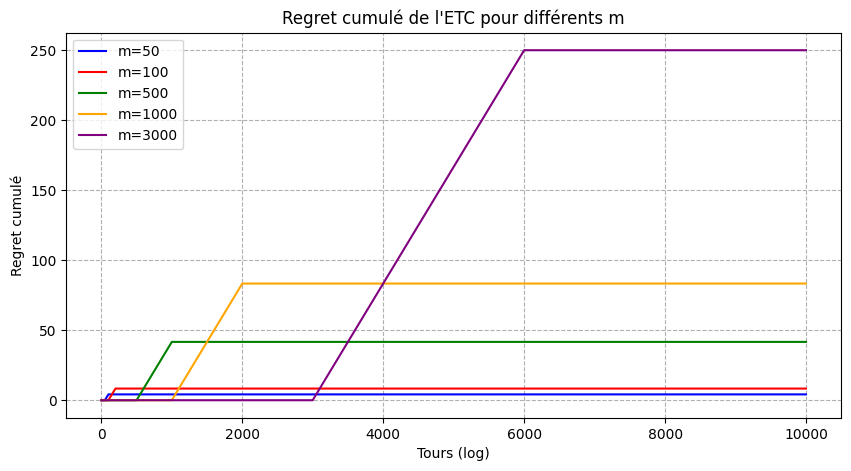

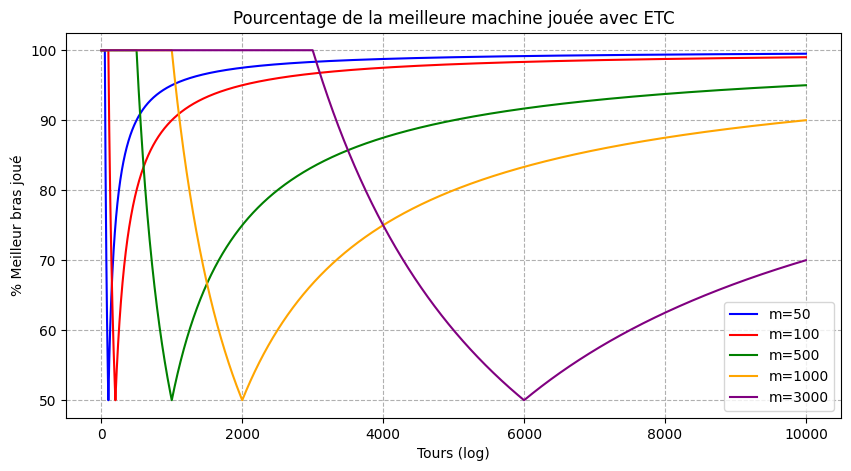

In [7]:
# Paramètres
n_rounds = 10000
p1 = 1/3
p2 = 1/4
folowing_m = [50, 100, 500, 1000, 3000]
colors = ["blue", "red", "green", "orange", "purple"]

#  Courbe du regret
plt.figure(figsize=(10, 5))

for idx, m in enumerate(folowing_m):
    algo_ETC = ETC(n_arms=2, m=m)
    rewards = []
    chosen_arms = []
    regrets_ETC = []
    expected_means = [p1, p2]

    for t in range(1, n_rounds + 1):
        arm = algo_ETC.select_arms_ETC()
        reward = distribution_reward(arm, p1, p2)
        algo_ETC.update(arm, reward)
        rewards.append(reward)
        chosen_arms.append(arm)
        tru_regret = regret(expected_means, algo_ETC, t)
        regrets_ETC.append(tru_regret)

    plt.plot(regrets_ETC, label=f"m={m}", color=colors[idx])

#plt.xscale("log")
plt.xlabel("Tours (log)")
plt.ylabel("Regret cumulé")
plt.title("Regret cumulé de l'ETC pour différents m")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.show()


#  Courbe du pourcentage du meilleur bras joué
plt.figure(figsize=(10, 5))

for idx, m in enumerate(folowing_m):
    algo_ETC = ETC(n_arms=2, m=m)
    chosen_arms = []
    best_arm = 0 if p1 >= p2 else 1
    best_arm_counts = []

    for t in range(1, n_rounds + 1):
        arm = algo_ETC.select_arms_ETC()
        reward = distribution_reward(arm, p1, p2)
        algo_ETC.update(arm, reward)
        chosen_arms.append(arm)

        best_arm_count = chosen_arms.count(best_arm)
        best_arm_counts.append(100 * best_arm_count / t)

    plt.plot(range(1, n_rounds + 1), best_arm_counts, 
             label=f"m={m}", color=colors[idx])

#plt.xscale('log')
plt.xlabel("Tours (log)")
plt.ylabel("% Meilleur bras joué")
plt.title("Pourcentage de la meilleure machine jouée avec ETC")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.show()



Le choix de m ne donne pas d'informations intéressantes sur l'apprentissage de l'algorithme car toutes les courbes ont les mêmes tendances a décalage près en fonction de m

## UCB1 VS ETC

On veut faire un comparaison entre l'algorithme UCB1 et ETC grace a une analyse des graphes de regrets cumulé pour chaque algorithmes

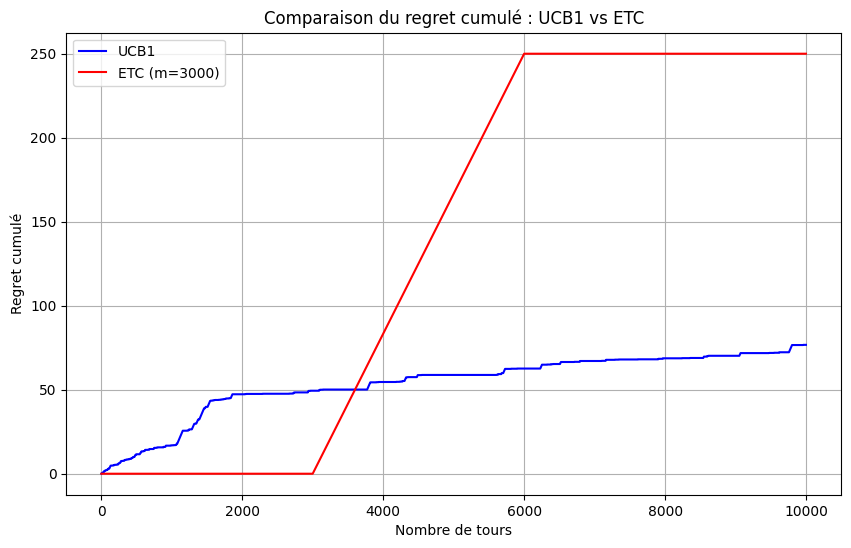

In [8]:

plt.figure(figsize=(10,6))
plt.plot(regrets_tru, label="UCB1", color="blue")
plt.plot(regrets_ETC, label=f"ETC (m={m})", color="red")
#plt.yscale("log")
#plt.xscale("log")
plt.xlabel("Nombre de tours")
plt.ylabel("Regret cumulé")
plt.title("Comparaison du regret cumulé : UCB1 vs ETC")
plt.legend()
plt.grid(True)
plt.show()

### Remarques et comparaisons


L’algorithme **UCB1** est un algorithme **adaptatif**, qui équilibre automatiquement l’exploration et l’exploitation. À chaque tour, il choisit le bras avec la plus haute borne supérieure de confiance :  

$$
\hat{\mu}_i + \sqrt{\frac{2 \ln t}{N_i}}
$$

Il continue donc d’explorer même tardivement si l’incertitude le justifie. Il ne nécessite aucun paramètre de réglage, ce qui le rend robuste et efficace. Son regret cumulatif est logarithmique en fonction du nombre de tours :  

$$
O(\log T)
$$



À l’inverse, l’algorithme **ETC (Explore-Then-Commit)** est **non adaptatif**, car il sépare clairement exploration et exploitation. Il commence par tirer chaque bras un nombre fixe de fois (paramètre \(m\)), puis choisit le bras avec la meilleure moyenne empirique pour le reste des tours.  

Cette approche est très simple à implémenter mais dépend fortement du choix de \(m\) :  
- Si \(m\) est trop petit, l’algorithme risque de choisir le mauvais bras.  
- Si \(m\) est trop grand, il gaspille des tours en exploration inutile.

Son regret est aussi logarithmique si \(m\) est bien calibré, sinon il peut être beaucoup plus élevé.  



En résumé, **UCB1** est généralement préféré en pratique pour sa robustesse et sa capacité d’adaptation sans réglage, tandis que **ETC** est simple mais sensible au paramètre \(m\).
